<a href="https://colab.research.google.com/github/juliezousa/portfolio/blob/main/supervised-learning/LOGISTIC_FITTING_REAL_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FIT A LOGISTIC-TYPE CURVE (S-CURVE) TO REAL DATA


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

In [ ]:
df = pd.read_clipboard()

In [ ]:
df

,royalty_autor
0,29020.06656
1,16746.00256
2,13868.75967
3,17920.78156
4,21548.93491
5,16725.29078
6,59000.00000
7,62570.52725
8,38693.43400
9,56214.08251


In [ ]:
len(df)

24

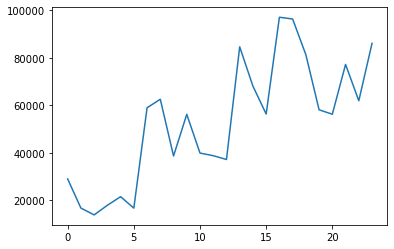

In [ ]:
plt.plot(df.royalty_autor)

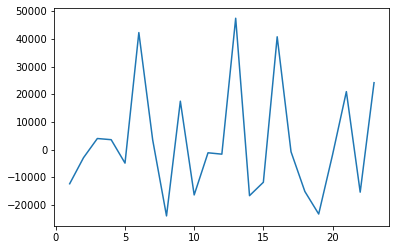

In [ ]:
plt.plot(df.royalty_autor.diff())

In [ ]:
#Defining the logistic function
def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0))) + 1

Fitting the logistic function on the data
We used some initialisation for the parameters as follows:


*   $L$ (the maximum expected number) = 80000 taken from the example

*   $k$ (growth rate) = 0.2 an approximated value cuz idk what one it's correct

*   $x_0$ (the year of the inflexion) = 6 approximated form on the example








Last quarter Royalty Receivement: 86132
Royalty Receivement aproximated for the next quarter: 86523


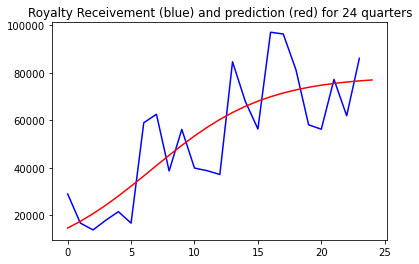

In [ ]:
p0 = [80000, 0.2, 6]

popt, pcov = curve_fit(logistic, df.index, df.royalty_autor, p0, method = "trf")
print("Last quarter Royalty Receivement: " + str(int(df.royalty_autor[-1:])))
print("Royalty Receivement aproximated for the next quarter: " + str(int(int(df.royalty_autor[-1:] + logistic(len(df) , *popt) - logistic(len(df)-1 , *popt)))))

plt.title("Royalty Receivement (blue) and prediction (red) for " + str(len(df)) + " quarters")
plt.plot(df.index, df.royalty_autor, 'b-', label='data')
plt.plot(range(len(df) + 1), logistic(range(len(df) + 1), *popt), 'r-', label='fit')

In [ ]:
pcov

array([[ 1.06585396e+08, -7.33038110e+02,  1.57800477e+04],
       [-7.33038110e+02,  8.41516182e-03, -9.66901736e-02],
       [ 1.57800477e+04, -9.66901736e-02,  3.63976583e+00]])

In [ ]:
popt[0]

78634.8281576602

In [ ]:
logistic(range(len(df) + 40), *popt)

array([14646.84076712, 17486.35457955, 20698.32245304, 24266.1810573 ,
       28150.25743351, 32286.861493  , 36590.78133838, 40961.40471015,
       45291.72689631, 49478.62261509, 53432.3463542 , 57083.47954274,
       60386.34159278, 63318.86308833, 65879.70077146, 68083.74449764,
       69957.13510253, 71532.62908563, 72845.78642364, 73932.14559269,
       74825.33835361, 75555.98642132, 76151.18746095, 76634.4087311 ,
       77025.63867281, 77341.68394565, 77596.53339613, 77801.73783848,
       77966.77486275, 78099.38204744, 78205.85127404, 78291.28262476,
       78359.7996821 , 78414.72977113, 78458.75339059, 78494.02717547,
       78522.28449345, 78544.91737067, 78563.04297479, 78577.55741462,
       78589.17917956, 78598.48415184, 78605.93378714, 78611.89777119,
       78616.67221899, 78620.49428328, 78623.55387412, 78626.00305653,
       78627.96358358, 78629.53293312, 78630.78914426, 78631.79469151,
       78632.59958762, 78633.24386842, 78633.75958244, 78634.17238409,
      

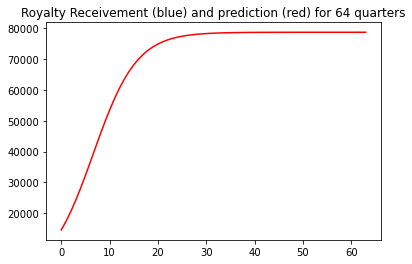

In [ ]:
plt.title("Royalty Receivement (blue) and prediction (red) for " + str(len(df)+40) + " quarters")
#plt.plot(df.index, df.royalty_autor, 'b-', label='data')
plt.plot(range(len(df) + 40), logistic(range(len(df) + 40), *popt), 'r-', label='fit')

In [ ]:
last_year1 = sum(df.royalty_autor[-4:])
print("Last year Royalty Receivement: " + str(int(last_year1)))
# print("Royalty Receivement aproximated for the next quarter: " + str(int(int(df.royalty_autor[-1:] + logistic(len(df) , *popt) - logistic(len(df)-1 , *popt))))) normalized

Last year Royalty Receivement: 281599
